# EUMAS

## Setup

In [109]:
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

In [130]:
def make_plot(data, name):
    numbers_of_agents = [2, 3, 5]
    colors = {2: '#1f77b4', 3: '#ff7f0e', 5: '#2ca02c'}
    line_styles = {'unrestricted': 'dashed', 'restricted': 'solid'}   
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

    for number_of_agents in numbers_of_agents:
        unrestricted_utility = -data[number_of_agents]['unrestricted']
        restricted_utility = -data[number_of_agents]['restricted']
        improvement = (unrestricted_utility - restricted_utility) / unrestricted_utility
        degree_of_restriction = data[number_of_agents]['degree_of_restriction']

        ax1.plot(unrestricted_utility, color=colors[number_of_agents], label='Unrestricted', linestyle=line_styles['unrestricted'])
        ax1.plot(restricted_utility, color=colors[number_of_agents], label='Restricted', linestyle=line_styles['restricted'])

        ax2.plot(improvement, color=colors[number_of_agents], label=f'{number_of_agents} agents')

        ax3.plot(degree_of_restriction, color=colors[number_of_agents], label=f'{number_of_agents} agents')

    lgd = fig.legend(labels=[f'{number_of_agents} agents ({type})' for number_of_agents in numbers_of_agents for type in ['unrestricted', 'restricted']], 
            loc='outside lower center', 
            ncol=3,
            bbox_to_anchor=(0.5, -0.02))

    ax1.set_ylabel('Governance utility')

    ax2.set_ylabel(r'Improvement')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    ax3.set_xlabel(r'Time step $t$')
    ax3.set_ylabel('Degree of restriction')
    ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, 0))

    # plt.tight_layout()
    fig.align_labels()
    fig.savefig(f'{name}.pdf', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Execution

### Deterministic agents

In [131]:
with open('eumas-deterministic.txt', 'r') as f:
    lines = f.readlines()

data = []
for line in lines:
    a = re.split('\)', line)
    b = [tuple(map(float, re.split(',', t[1:]))) for t in a if t != '\n']
    _, Y = zip(*b)
    data.append(Y)

data = pd.DataFrame(data).transpose()
data.columns = pd.MultiIndex.from_product([[5, 2, 3], ['unrestricted', 'restricted', 'degree_of_restriction']])

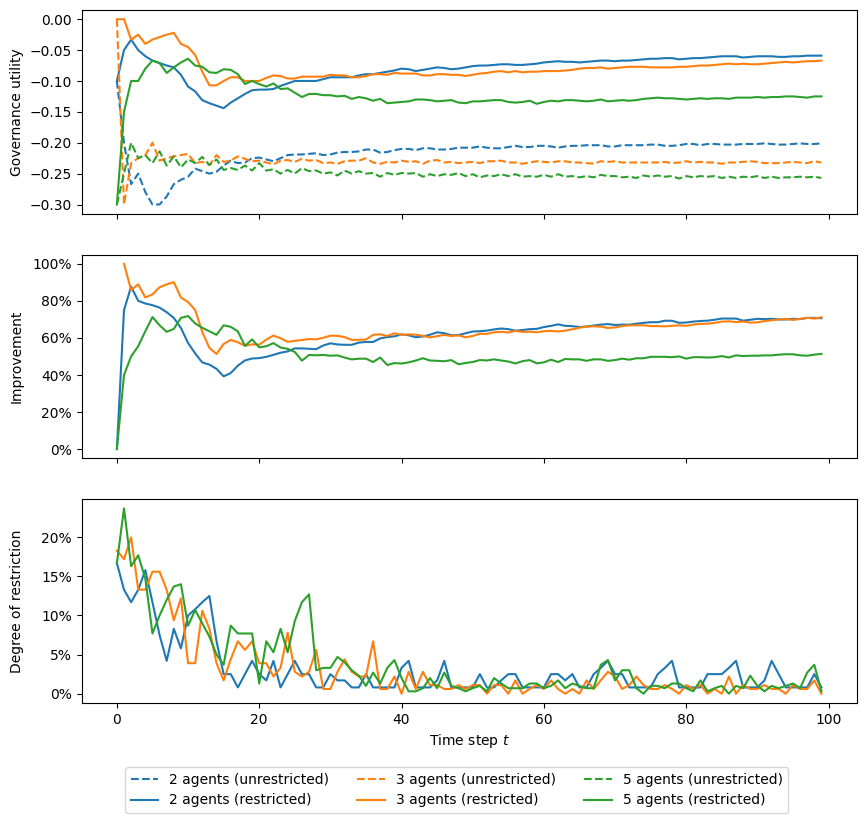

In [132]:
make_plot(data, 'deterministic')

### Stochastic agents

In [133]:
with open('eumas-stochastic.txt', 'r') as f:
    lines = f.readlines()

data = []
for line in lines:
    a = re.split('\)', line)
    b = [tuple(map(float, re.split(',', t[1:]))) for t in a if t != '\n']
    _, Y = zip(*b)
    data.append(Y)

data = pd.DataFrame(data).transpose()
data.columns = pd.MultiIndex.from_product([[2, 3, 5], ['unrestricted', 'restricted', 'degree_of_restriction']])

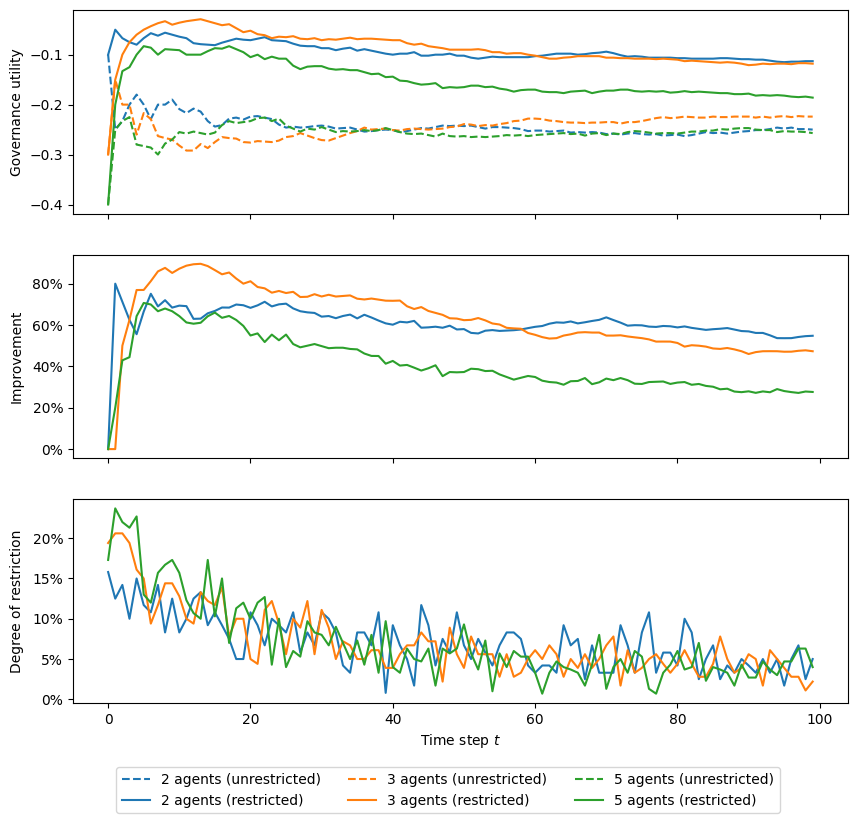

In [134]:
make_plot(data, 'stochastic')